### The SQL query used to extract the data is included.

```
select *
from city_data
where city = 'New York'


select *
from city_data
where city = 'Philadelphia'


select *
from global_data

```

#### csv File is stored in the folder and analized and visualized with python panda as follows 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [39]:
nyc_data = pd.read_csv('NYC.csv')

In [40]:
globle_data = pd.read_csv('Global_data.csv')

In [41]:
Philadelphia_data = pd.read_csv('Philadelphia.csv')

In [42]:
result= pd.merge(nyc_data,Philadelphia_data, on = 'year' )

In [43]:
f_result = pd.merge(result, globle_data, on='year')

In [44]:
f_result.head()

,year,city_x,country_x,avg_temp_x,city_y,country_y,avg_temp_y,avg_temp
0,1750,New York,United States,10.07,Philadelphia,United States,12.36,8.72
1,1751,New York,United States,10.79,Philadelphia,United States,13.05,7.98
2,1752,New York,United States,2.81,Philadelphia,United States,5.64,5.78
3,1753,New York,United States,9.52,Philadelphia,United States,11.85,8.39
4,1754,New York,United States,9.88,Philadelphia,United States,12.29,8.47


In [45]:
f_result['new_york_temp']=f_result['avg_temp_x']
f_result['Philadelphia_temp']=f_result['avg_temp_y']
f_result['globle_temp'] = f_result['avg_temp'] 

In [48]:
select = ['year', 'new_york_temp', 'Philadelphia_temp', 'globle_temp']

In [49]:
temp_comp= f_result[select]

In [56]:
temp_comp['new_york_temp'].mean()

9.486882129277568

In [62]:
temp_comp['new_york_temp'].fillna(temp_comp['new_york_temp'].mean(), inplace=True)
temp_comp['Philadelphia_temp'].fillna(temp_comp['Philadelphia_temp'].mean(), inplace=True)

E:\soft\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [64]:
temp_comp['new_york_temp_7MA']= temp_comp['new_york_temp'].rolling(7).mean()
temp_comp['Philadelphia_temp_7MA']= temp_comp['Philadelphia_temp'].rolling(7).mean()
temp_comp['globle_temp_7MA']= temp_comp['globle_temp'].rolling(7).mean()

E:\soft\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\soft\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\soft\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

## Line chart creation 

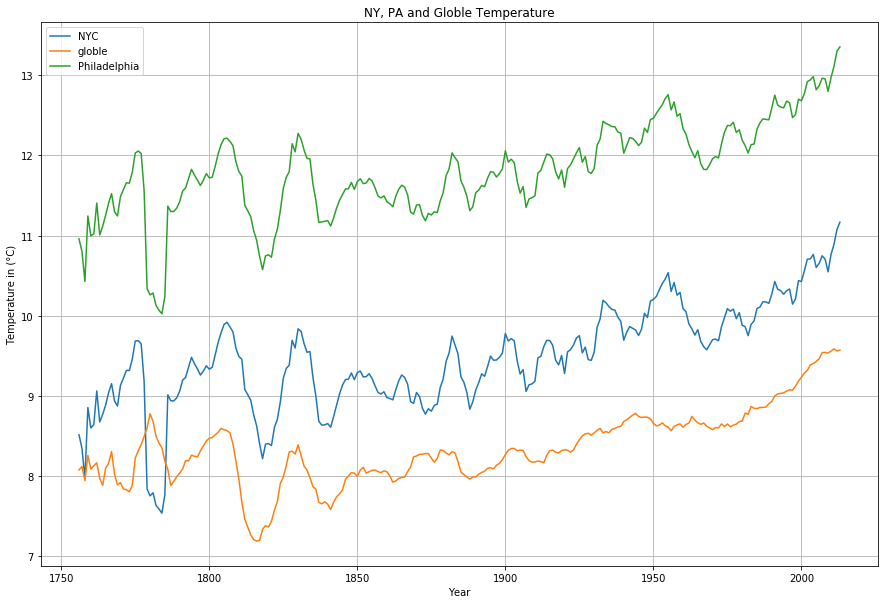

In [67]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(temp_comp['year'],temp_comp['new_york_temp_7MA'], label="NYC")
plt.plot(temp_comp['year'],temp_comp['globle_temp_7MA'], label="globle")
plt.plot(temp_comp['year'],temp_comp['Philadelphia_temp_7MA'], label="Philadelphia")
plt.xlabel('Year')
plt.ylabel('Temperature in (°C)')
plt.title('NY, PA and Globle Temperature')
plt.legend(loc=2)


## Observations

1. New york temperatue is almost 1 degree higher then globle average temperater and themperature change flactuation is high rater then globle average temperater.

2. Philadelphia temperatue is  almost 2 degree higher the new york and temperature  flactuated is almost similar to  new york. 

3. New york temperature and globle temperature is gradually increase over time, that means world is getting warmer over time.

4. Last few years  the New york  and Philadelphia temperature rising faster then the globle temperature.